In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime, timedelta

Open the merged data file:

In [18]:
sortedTable = pd.read_csv('merged_data_file.csv')

In [3]:
sortedTable

,Unnamed: 0,prDM_rounded,t090C,c0Sm,t190C,c1Sm,sbeox0MmL,sbeox1MmL,sal00,sal11,...,NOx_uM,NOx_flag,Nitrite_uM,Nitrite_flag,PO4_uM,PO4_flag,Silicate_uM,Silicate_flag,Chla,Flag_ODV
0,0,147,17.993555,4.681435,17.996055,4.681442,210.869741,213.977241,35.733634,35.731509,...,1.06,0.0,0.072,0.0,0.18,0.0,1.7,0.0,0.095,4.0
1,1,110,18.547090,4.735257,18.553176,4.735454,204.486000,206.988286,35.723543,35.719938,...,1.23,0.0,0.055,0.0,0.19,0.0,2.1,0.0,0.117,0.0
2,2,87,19.790150,4.859807,19.806825,4.860796,216.141300,217.294150,35.704425,35.698390,...,0.19,0.0,0.083,0.0,0.11,0.0,1.6,0.0,0.327,0.0
3,3,40,21.137304,5.008486,21.139377,5.008373,210.746269,214.701615,35.793812,35.791192,...,0.02,0.0,0.018,0.0,0.07,0.0,1.2,0.0,0.241,0.0
4,4,20,21.431656,5.038278,21.438661,5.038732,211.387284,215.621421,35.793484,35.791256,...,0.02,0.0,0.016,0.0,0.06,0.0,1.1,0.0,0.162,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,20526,2208,2.127784,3.162202,2.128597,3.162278,165.136226,170.195857,34.730946,34.731017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20527,20527,2209,2.128281,3.162285,2.129088,3.162361,165.114539,170.205013,34.730937,34.731014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20528,20528,2210,2.128632,3.162356,2.129409,3.162429,165.163920,170.159095,34.730947,34.731006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20529,20529,2211,2.128968,3.162428,2.129706,3.162499,165.163860,170.217643,34.730946,34.731000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Open the underway data file:

In [4]:
UWdata = pd.read_csv('in2024_t01_Chla_Nutrients.csv')

In [5]:
# Assuming UWdata is a pandas DataFrame with columns 'date' and 'time_UTC_'
date_csv = UWdata['date']  # e.g., '9-Mar'
time_csv = UWdata['time[UTC]']  # e.g., '1:02'

# Initialize an empty list to store the converted datetime objects
datetime_csv = []

# Loop over each date and time string
for date_str, time_str in zip(date_csv, time_csv):
    
    # Combine date and time into a single string
    datetime_str = f"{date_str} {time_str}"
    
    # Convert to datetime object and append to the list
    datetime_obj = datetime.strptime(datetime_str, "%d/%m/%Y %H:%M:%S").strftime("%Y-%m-%d %H:%M:%S")
    datetime_csv.append(datetime_obj)

Open the netcdf file:

In [6]:
ds = xr.open_dataset('in2024_t01uwy.nc')

In [7]:
ds

<xarray.Dataset>
Dimensions:                       (history: 100, sample: 187132)
Coordinates:
  * history                       (history) object b'Underway netCDF file cre...
Dimensions without coordinates: sample
Data variables: (12/201)
    historyIdent                  (history) object ...
    historyDate                   (history) float64 ...
    rawLatitude                   (sample) float64 ...
    latitude                      (sample) float64 ...
    latitudeQC                    (sample) float32 ...
    rawLongitude                  (sample) float64 ...
    ...                            ...
    rawDo                         (sample) float32 ...
    do                            (sample) float32 ...
    doQC                          (sample) float32 ...
    rawDoSaturation               (sample) float32 ...
    doSaturation                  (sample) float32 ...
    doSaturationQC                (sample) float32 ...
Attributes:
    Conventions:           COARDS
    Ship:                  Investigator
    Voyage:                in2024_t01
    Epoch:                 5880110 seconds since 2024-01-01 00:00:00 00
    SampleInterval:        5
    MaxInterpolationSpan:  24
    SamplingUnits:         Sampling interval is in seconds, max. interpolatio...

We need to get the information about the sample times for this netcdf file. We can read in the attributes some information about that.

In [8]:
# Define the start time
start_time = datetime(2024, 1, 1, 0, 0, 0)

# Define the epoch time in seconds
epoch_seconds = 5880110

# Define the sampling interval in seconds
sampling_interval = 5

# Convert the epoch time to a timedelta duration
epoch_duration = timedelta(seconds=epoch_seconds)

# Add the duration to the start time to get the exact time of the first sample
exact_time_first_sample = start_time + epoch_duration

# Define the number of sampling events
num_samples = 187132

# Create an array of sample times
sample_times = np.array([exact_time_first_sample + timedelta(seconds=i * sampling_interval) for i in range(num_samples)])

# Ensure it is a column vector
sample_times = sample_times.reshape(-1, 1)[:,0]
for i in range(len(sample_times)):
    sample_times[i] = sample_times[i].strftime("%Y-%m-%d %H:%M:%S")

Now we want to find matching sampling events in the netcdf file to the csv file

In [9]:
matching_indices = []
for i in range(len(datetime_csv)):
    if len(np.where(sample_times == datetime_csv[i])[0]) == 1: 
        matching_indices.append(np.where(sample_times == datetime_csv[i])[0][0])
    else:
        matching_indices.append(np.nan)

Read underway variables that match the date/time of the CSV file sampling events.

In [10]:
# Add more variable names as needed
var_names = ['latitude', 'longitude', 'waterTemp', 'fluorescenceConcentration', 'depth', 'portPAR']

In [12]:
# Loop over each variable name
for var_name in var_names:
    # Read the variable data from the NetCDF file
    var_data = ds.variables[var_name][:]
    
    # Extract the subset of data using the valid indices
    #var_subset = var_data[matching_indices[~np.isnan(matching_indices)]].values
    
    # Create a new column in the UWdata DataFrame
    UWdata[f'{var_name}_subset'] = np.nan  # Initialize with NaN
    
    # Populate the new column with the subset of data, skipping the first cell
    for m in range(len(matching_indices)):
        if ~np.isnan(matching_indices[m]):
            UWdata.iloc[m, UWdata.columns.get_loc(f'{var_name}_subset')] = var_data[matching_indices[m]].item()

Define your data

In [33]:
x = np.concatenate([sortedTable['Chla '].values, UWdata['Chl-a mean'].values])
y = np.concatenate([sortedTable['flECO_AFL'].values, UWdata['fluorescenceConcentration_subset'].values])
c = np.concatenate([sortedTable['par'].values, UWdata['portPAR_subset'].values])

In [52]:
p = np.polyfit(x[~np.isnan(y*x)], y[~np.isnan(y*x)], 1)
y_fit = np.polyval(p, x)

In [66]:
linear_fit_str = str(np.round(p[1], 2)) +' + '+str(np.round(p[0], 2))+'*x'

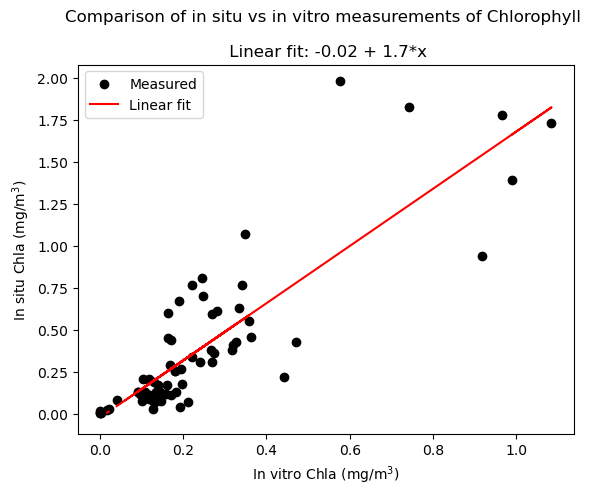

In [68]:
plt.scatter(x, y, c = 'k', label = 'Measured')
plt.plot(x, y_fit, c = 'r', label = 'Linear fit')
plt.legend()
plt.xlabel('In vitro Chla (mg/m$^3$)');
plt.ylabel('In situ Chla (mg/m$^3$)');
plt.title('Comparison of in situ vs in vitro measurements of Chlorophyll \n \n Linear fit: '+ linear_fit_str );

In [59]:
import cartopy.crs as ccrs
import cartopy.feature as cft

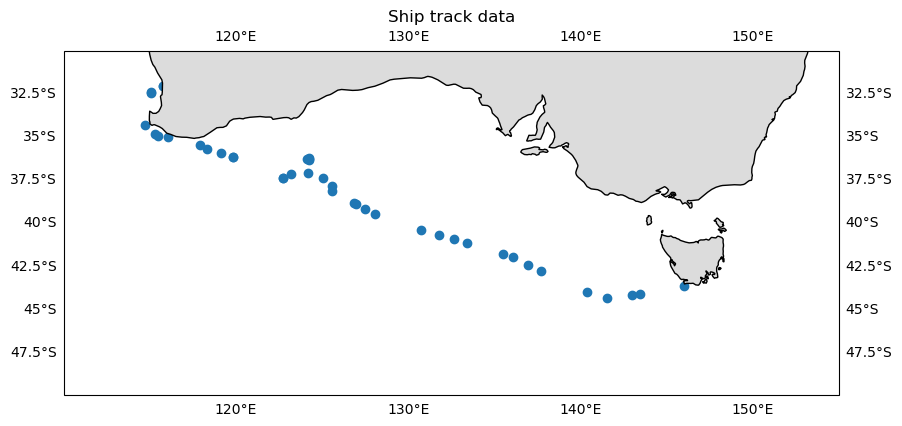

In [63]:

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude = 130))
# Set the limits of the map [longitude_west, longitude_east, latitude_south, latitude_north]
ax.set_extent([110, 155, -50, -30], crs = ccrs.PlateCarree())
# Draw the land in grey with edges in black at 50m resolution
ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gainsboro'))
# Add gridlines with latitude, longitude ticks
gl = ax.gridlines(draw_labels = True, linewidth = 0)
gl.xformatter = ccrs.cartopy.mpl.ticker.LongitudeFormatter()
gl.yformatter = ccrs.cartopy.mpl.ticker.LatitudeFormatter()

ax.scatter(UWdata['Longitude'], UWdata['Latitude'], transform = ccrs.PlateCarree())
plt.title('Ship track data');